<h1 style="text-align: center;"><a title="Data Science-AIMS-Cmr-2021-22">Multivariate Models as Neural Networks</h1>

## <font color="green"> Learning outcomes:

* Splitting data into training/testing using Scikit-learn

* use ```plot_model``` to get another view of the model

* learn about ```tensorflow.keras.initializers```

* use ```tf.random.set_seed``` for reproducible results

* creating an ANN model

## <font color="green">Data information:

* Features: 12 feature (real-valued) input

* Output: 1 real valued output

## <font color="green">Tasks for participants (boolean)?

* Yes, at the end (try avoid copy/pasting code, rather write it out)

## Various Python imports

In [ ]:
import numpy as np
np.random.seed(1337) # for reproducibility
import pandas
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics
from tensorflow.keras.utils import plot_model

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import Huber
import tensorflow as tf

## Load the dataset

There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features. 

Here we use the pandas read_csv function which lets us read CSV-style files.

In [ ]:
dataframe = pandas.read_csv("http://www.emmanueldufourq.com/BostonHousePrice.txt", header=None,delim_whitespace=True)

## View top 5 records

It's always a good idea to take a look at the data before doing any ML related task

In [ ]:
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


We can extract the values from the dataframe by calling the .values() function

In [ ]:
dataset = dataframe.values

## View all data

In [ ]:
dataset

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [ ]:
dataset.shape

(506, 14)

Okay so we have 506 records and 14 columns. One column is the target class, namely the last column. So given this information, we can split the dataset into the features and the target class. The first 13 columns will be our features, typically denoted as X and the last column is the class, typically denoted as Y.

## Split the data into features and the class values

In [ ]:
X = dataset[:,0:13]
Y = dataset[:,13]

It is generally a good idea to check your data once you conduct some manipulation. Here we split the data so it would be wise to check that we did this correctly. One way would be to check the shapes of the data and then look at some values.

## Check the shapes of the data

In [ ]:
X.shape

(506, 13)

In [ ]:
Y.shape

(506,)

In [ ]:
Y[0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

After inspection, the shapes look correct and the target values look correct too. Once we have our data into X (features) and Y (class) variables we can proceed to the next step which is to create training and testing data. It is typically a good idea to split the data into training, validation and testing.

To do this, we can use Scikit learn's train_test_split function. Check out the documentation https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test#sklearn.model_selection.train_test_split

We can use the function twice. The first time we split X and Y into two sets (training and testing). We then leave the testing data. We take the training data and then split it into two (training and validation). In doing so, we create three splits.

Check out the two parameters: test_size and random_state.

## Split the data into training and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1) 

It is generally a good idea to check your data once you conduct some manipulation. Here we split the data so it would be wise to check that we did this correctly. One way would be to check the shapes of the data and then look at some values.

In [ ]:
print ('X_train shape:',X_train.shape)
print ('Y_train shape:',Y_train.shape)

print ()

print ('X_val shape:',X_val.shape)
print ('Y_val shape:',Y_val.shape)

print ()

print ('X_test shape:',X_test.shape)
print ('Y_test shape:',Y_test.shape)

X_train shape: (323, 13)
Y_train shape: (323,)

X_val shape: (81, 13)
Y_val shape: (81,)

X_test shape: (102, 13)
Y_test shape: (102,)


## Create a neural network model

In the previous example, we created the model directly into the notebook cells. This time we will create the model in a Python function so that we can call it several times to re-create the model (should we wish to).

The function below shows you how to stack layers, i.e. we call the .add() function twice. In this manner, you can add more layers and create deeper neural networks. After defining the architecture of the model we call the compile function with mean squared error loss. Finally, we return the whole model object.

Note that here we call the Python function 'baseline'. You can all it anything you want; it is a normal Python function. Similarily, the variable 'model' in the code could be called anything you want. It helps to use meaninig names, just like with normal variables in any programming language.

We add some more details this time:

1) We define how the weights are initialised

2) We define the optimiser.

3) We set a seed

4) We set the loss function

For (1) here we specify that each weight parameter should be randomly sampled from a normal distribution with mean 0 and standard deviation 0.01. The bias parameter will be initialized to zero. We use the RandomNormal (https://tensorflow.google.cn/api_docs/python/tf/keras/initializers/RandomNormal). There are various initialisation methods, take a look at the API. Note that we added an extra import at the top of this notebook.

For (2) here we specify that we want to use the Adam optimiser (https://tensorflow.google.cn/api_docs/python/tf/keras/optimizers/Adam) but there are of course other options (e.g. SGD) - take a look at the API. Note that we added an extra import at the top of this notebook.

For (3) this allows us to get the same results everytime we create the model and execute training and predictions. If we remove this, and train various times we will get different results. Sometimes having reproducible results is desirable.  Documentation on reproducible results: https://www.tensorflow.org/api_docs/python/tf/random/set_seed

For (4) we specify the loss function as a Tensorflow.keras.losses object https://tensorflow.google.cn/api_docs/python/tf/keras/losses/MeanSquaredError there are other loss functions available, check out the API. Of course, not all loss functions will make sense for a problem.

In [ ]:
# define the model
def baseline():

    # Seeting a seed so we can reproduce the results
    tf.random.set_seed(1337)

    # create model
    model = Sequential()

    # Define the initialisation method
    initializer = RandomNormal(mean = 0.0, stddev=0.01)
    
    # add one fully connected layer
    model.add(Dense(units = 13, input_dim=13, activation='relu', kernel_initializer = initializer))
    
    # add a fully connected layer for the output
    model.add(Dense(1, activation='linear', kernel_initializer = initializer))
    
    # Define the optimiser
    optimiser = Adam(learning_rate=0.001)

    # Define the loss function
    loss_mse = MeanSquaredError()
    
    # Compile model
    model.compile(loss=loss_mse, optimizer=optimiser, metrics=[metrics.mse])
    
    return model

## Task: given the above function, can you draw the model on paper. When you are done, check your answer by comparing it to the plot below.

## Initialise model

To initialise the model, we call our Python function which contains the model.

In [ ]:
model = baseline()

## Determine the number of trainable parameters and view the model

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 14        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


We can also view the model by plotting it. It gives a different perspective if you prefer this view. To do this we use the plot_model() function.

API documentation for the plot_model() function https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model?hl=en

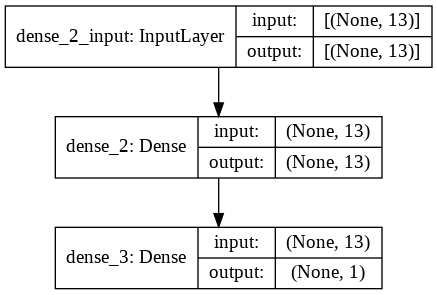

In [ ]:
plot_model(model, show_shapes=True)

## Train the model

Now that we have the training, validation and testing features and targets we can start training the network. To do this, we make use of the .fit() function like in the previous notebook. Take a moment to explore the different outputs that are obtained when using different 'verbose' values. Look at the API (https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) to find out the different values.

Something is new here. We are specifying validation data.

In [ ]:
history = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs=20, batch_size=5, verbose=1)

Epoch 1/20
65/65 [==============================] - 1s 3ms/step - loss: 388.6302 - mean_squared_error: 388.6302 - val_loss: 124.6787 - val_mean_squared_error: 124.6787
Epoch 2/20
65/65 [==============================] - 0s 2ms/step - loss: 120.3715 - mean_squared_error: 120.3715 - val_loss: 99.9814 - val_mean_squared_error: 99.9814
Epoch 3/20
65/65 [==============================] - 0s 2ms/step - loss: 96.7785 - mean_squared_error: 96.7785 - val_loss: 82.0480 - val_mean_squared_error: 82.0480
Epoch 4/20
65/65 [==============================] - 0s 2ms/step - loss: 81.6800 - mean_squared_error: 81.6800 - val_loss: 71.8240 - val_mean_squared_error: 71.8240
Epoch 5/20
65/65 [==============================] - 0s 2ms/step - loss: 73.4918 - mean_squared_error: 73.4918 - val_loss: 66.1938 - val_mean_squared_error: 66.1938
Epoch 6/20
65/65 [==============================] - 0s 2ms/step - loss: 68.6810 - mean_squared_error: 68.6810 - val_loss: 62.6227 - val_mean_squared_error: 62.6227
Epoch 7/20

## Plot the loss

Something new here too, we are plotting the training and validation loss. This helps us keep an eye out for over-fitting.

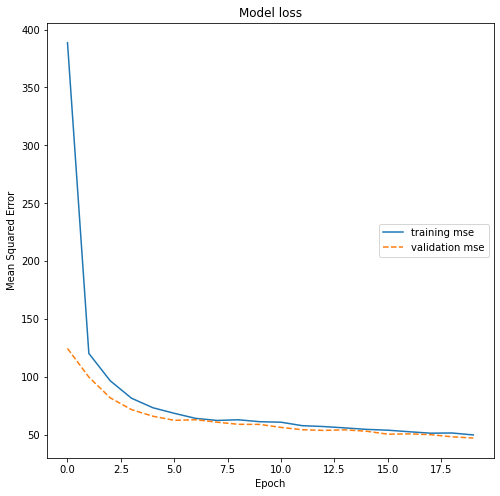

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['mean_squared_error'], label='training mse')
plt.plot(history.history['val_mean_squared_error'], label='validation mse', linestyle='dashed')
plt.title('Model loss')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(loc='right')
plt.show()

## Predict on the validation data

In the previous notebook we used the .predict() function to predict on one value. Now we can predict on multiple values.

In [ ]:
prediction_val = model.predict(X_val)

## Compute the mean squared error on the validation data

In [ ]:
mean_squared_error(Y_val, prediction_val)

47.35068105433894

Typically, we would explore a variety of models on the validation data. Once we have our best model on the validation data we would then evaluate the model on the testing data. Hyper-parameter tuning (i.e. figuring out the best model etc) should not be done using the testing data, we should use the validation data instead.

In our case let's assume that our model is good enough and let us proceed to evaluating on the testing data.

## Predict on the test data

In [ ]:
prediction_test = model.predict(X_test)

## Compute the mean squared error

In [ ]:
mean_squared_error(Y_test, prediction_test)

65.75112420058812

# <hr>
## Task Create a deeper model with more layers!

* Here, your task is to create a deeper model to improve the performance compared to the baseline model presented in this notebook.
* Do not modify the 'baseline' function. Instead, create a new Python function for your new model.  Explore the following:

1) Add more dense layers.

2) You will have to decide on the number of dense layers and the number of units for each one.

3) Once you have created your model you can run the cells again to train the model.

4) Try different things! Change the number of units in all the layers. Do you get errors? If you get errors, why do you think they are happening? Change the activation function. Do they make sense? Does ReLU make sense on this data? What about sigmoid?

5) Try the Huber loss instead of mean-squared error. API: https://www.tensorflow.org/api_docs/python/tf/keras/losses/Huber which one gave a better result (MSE vs Huber)?

6) Try using SGD instead of Adam optimiser.

# References:

* This notebook was adpated from Dr. Emmanuel Dufourq,  2021 Gene Golub SIAM Summer School 